# Tugas 2
### Aulia Cisatra (5026201124)

## Dataset
Dataset yang digunakan adalah dataset kualitas wine yang dapat diunduh pada link berikut [here](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download). 

In [1]:
### Import Library
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/winequality.csv')

In [10]:
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column quality


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [4]:
### Universal feature selection

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(X.columns)

featurescores = pd.concat([column,scores],axis=1)
featurescores.columns = ['Specs','Score']  #naming the dataframe columns

print(featurescores.nlargest(10,'Score'))  #print 10 best features

                   Specs        Score
6   total sulfur dioxide  2755.557984
5    free sulfur dioxide   161.936036
10               alcohol    46.429892
1       volatile acidity    15.580289
2            citric acid    13.025665
0          fixed acidity    11.260652
9              sulphates     4.558488
3         residual sugar     4.123295
4              chlorides     0.752426
8                     pH     0.154655


<Axes: >

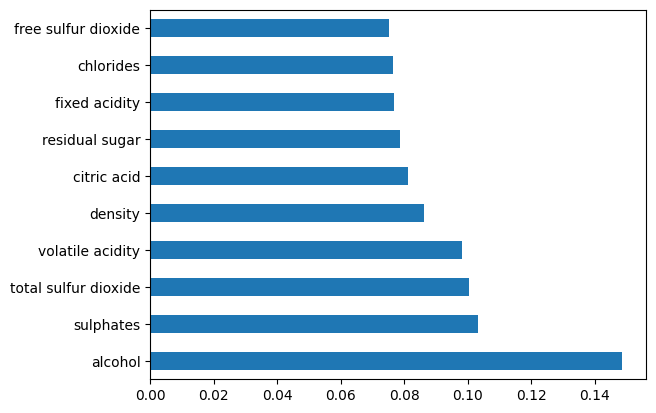

In [5]:
#feature selection

model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(10).plot(kind='barh')

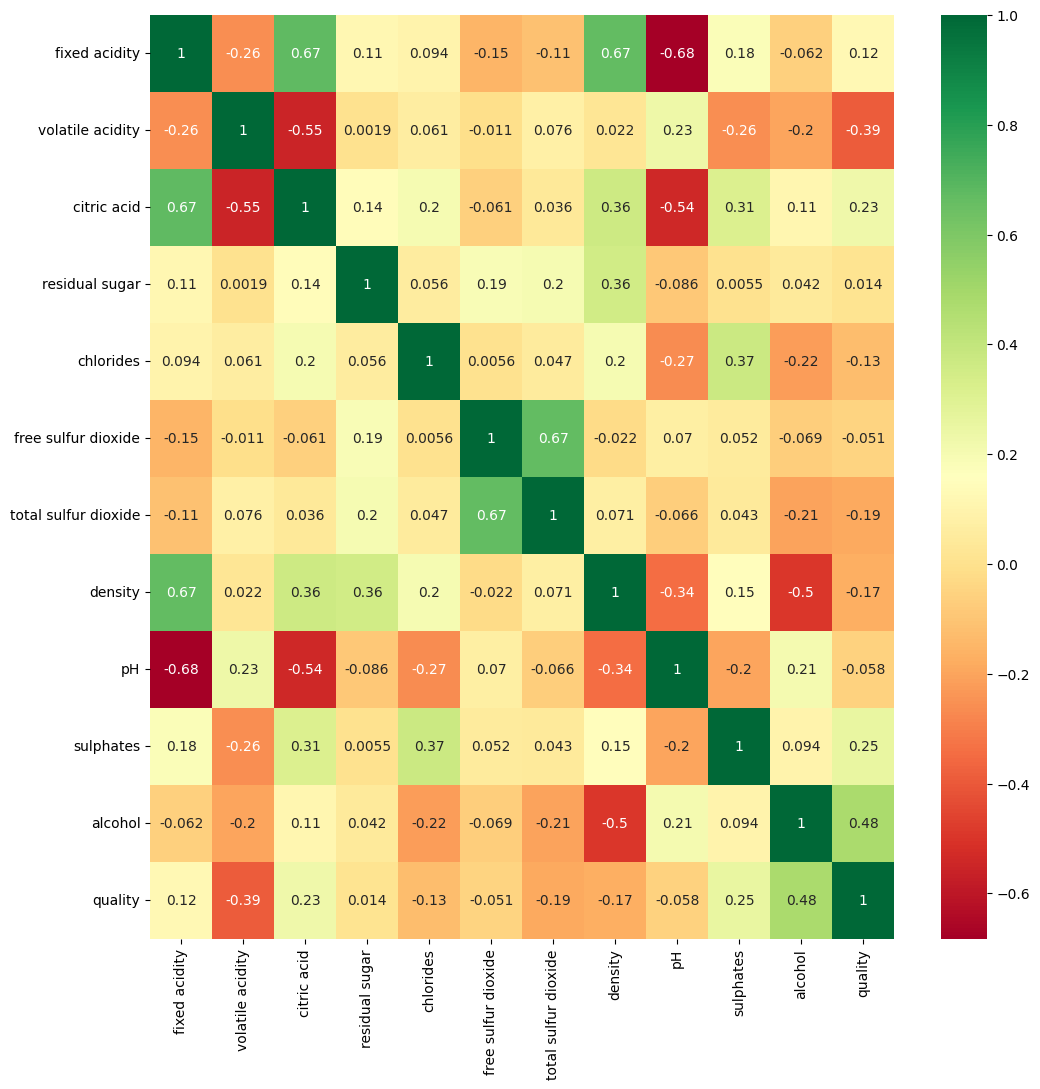

In [6]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))

g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
### Forward Selection

from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [25]:
sfs = SFS(LinearRegression(), k_features=11, forward=True, floating=False, verbose=2, scoring='r2', cv=0)

sfs.fit(X, y)

feat_importances = pd.Series(sfs.get_support(), index=X.columns)







[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2023-02-28 10:45:34] Features: 1/11 -- score: 0.22673436811275482[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2023-02-28 10:45:35] Features: 2/11 -- score: 0.31700243279698515[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2023-02-28 10:45:35] Features: 3/11 -- score: 0.335897315652697[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

AttributeError: 'SequentialFeatureSelector' object has no attribute 'get_support'